<a href="https://colab.research.google.com/github/NickMuhigi/Summative_Intro_To_ML_assignment.ipynb/blob/main/Summative_Intro_to_ml_%5BNicolas_Muhigi%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam

import io
from IPython.display import display
import ipywidgets as widgets

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [21]:
import io
from IPython.display import display
import ipywidgets as widgets

upload = widgets.FileUpload(accept='.csv', multiple=False)
display(upload)

def handle_upload(upload_widget):
    if upload_widget.value:
        name = list(upload_widget.value.keys())[0]
        content = upload_widget.value[name]['content']
        return pd.read_csv(io.BytesIO(content))
    else:
        return None

FileUpload(value={}, accept='.csv', description='Upload')

In [22]:
df = handle_upload(upload)

if df is not None:
    df['Magnitude'] = pd.to_numeric(df['Magnitude'], errors='coerce')
    df = df.dropna(subset=['Magnitude', 'Latitude', 'Longitude', 'Depth'])
    df['HighMag'] = (df['Magnitude'] >= 6.0).astype(int)
    df = df[['Latitude', 'Longitude', 'Depth', 'Magnitude', 'HighMag']]
    display(df.head())
else:
    print("Please upload the dataset first.")

,Latitude,Longitude,Depth,Magnitude,HighMag
0,19.246,145.616,131.6,6.0,1
1,1.863,127.352,80.0,5.8,0
2,-20.579,-173.972,20.0,6.2,1
3,-59.076,-23.557,15.0,5.8,0
4,11.938,126.427,15.0,5.8,0


#SECTION 1: Model Architecture:




>
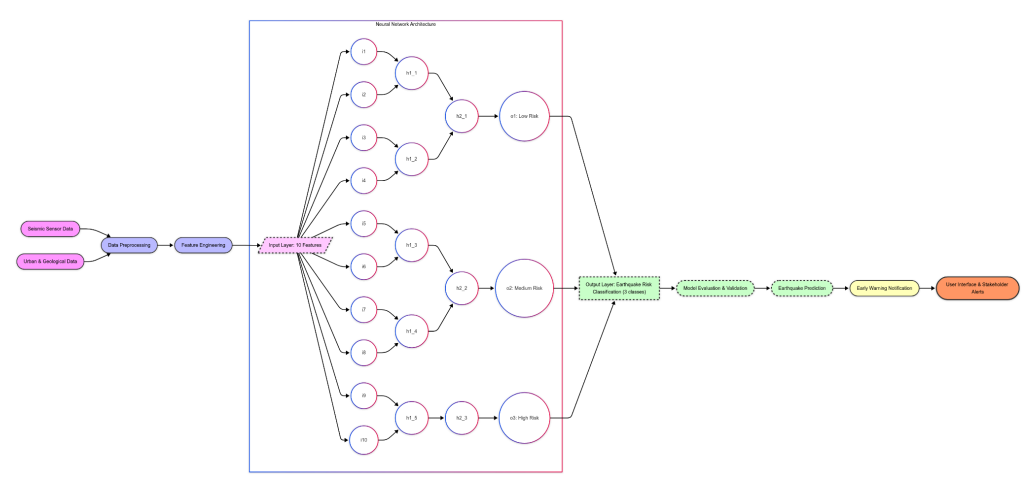




#Task: Define a function that creates models without and With specified Optimization techniques


In [6]:
def define_model(optimizer='adam', use_regularizer=False, early_stopping=False, dropout=0.0, learning_rate=0.001):
    model = Sequential()
    reg = l2(0.002) if use_regularizer else None

    model.add(Dense(64, activation='relu', input_shape=(4,), kernel_regularizer=reg))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(32, activation='relu', kernel_regularizer=reg))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)
    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_loss', patience=6, min_delta=0.002)] if early_stopping else []

    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)
    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [7]:
def loss_curve_plot(history):
    plt.plot(history.history['loss'], 'bo', label='Training loss')
    plt.plot(history.history['val_loss'], 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
X = df[['Latitude', 'Longitude', 'Depth', 'Magnitude']]
y = df['HighMag']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6124 - loss: 1.0880 - val_accuracy: 0.6521 - val_loss: 0.7234
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6337 - loss: 0.7311 - val_accuracy: 0.6965 - val_loss: 0.7151
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6605 - loss: 0.6855 - val_accuracy: 0.6219 - val_loss: 0.7408
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6675 - loss: 0.6748 - val_accuracy: 0.7073 - val_loss: 0.6280
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6780 - loss: 0.6478 - val_accuracy: 0.7218 - val_loss: 0.5874
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6838 - loss: 0.6385 - val_accuracy: 0.6708 - val_loss: 0.6455
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6820 - loss: 0.6418 - val_accuracy: 0.6703 - val_loss: 0.6974
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6934 - loss: 0.6239 - val_accuracy: 0.5846 - val_

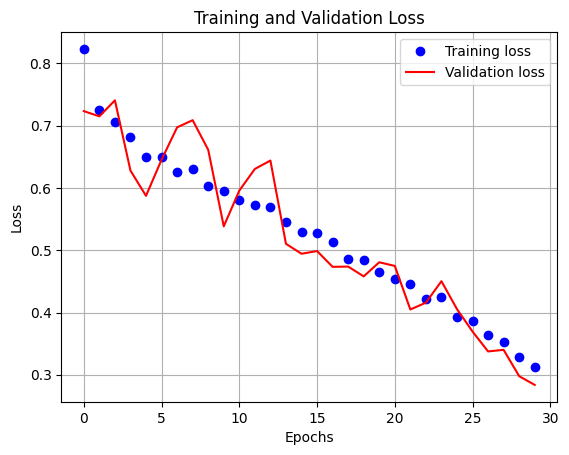

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Baseline Model Accuracy: 0.9151
Baseline Model F1 Score: 0.8660
Baseline Model Recall: 0.8440
Baseline Model Precision: 0.8892


In [25]:
model_1, history_1 = define_model(optimizer='adam', use_regularizer=False, early_stopping=False, dropout=0.0, learning_rate=0.001)

loss_curve_plot(history_1)

y_pred_1 = (model_1.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)

print(f"Baseline Model Accuracy: {accuracy_1:.4f}")
print(f"Baseline Model F1 Score: {f1_1:.4f}")
print(f"Baseline Model Recall: {recall_1:.4f}")
print(f"Baseline Model Precision: {precision_1:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6361 - loss: 0.8171 - val_accuracy: 0.4459 - val_loss: 1.0145
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6411 - loss: 0.7387 - val_accuracy: 0.5735 - val_loss: 0.7818
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6573 - loss: 0.6770 - val_accuracy: 0.6797 - val_loss: 0.6395
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6698 - loss: 0.6458 - val_accuracy: 0.6737 - val_loss: 0.6368
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6808 - loss: 0.6415 - val_accuracy: 0.7099 - val_loss: 0.5853
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6836 - loss: 0.6422 - val_accuracy: 0.6948 - val_loss: 0.7496
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6888 - loss: 0.6338 - val_accuracy: 0.6908 - val_loss: 0.6095
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7023 - loss: 0.6092 - val_accuracy: 0.4707 - val_

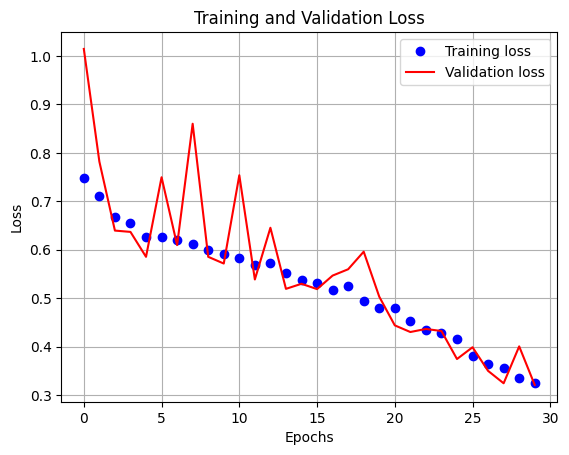

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2371
           1       0.99      0.54      0.70      1141

    accuracy                           0.85      3512
   macro avg       0.90      0.77      0.80      3512
weighted avg       0.87      0.85      0.83      3512



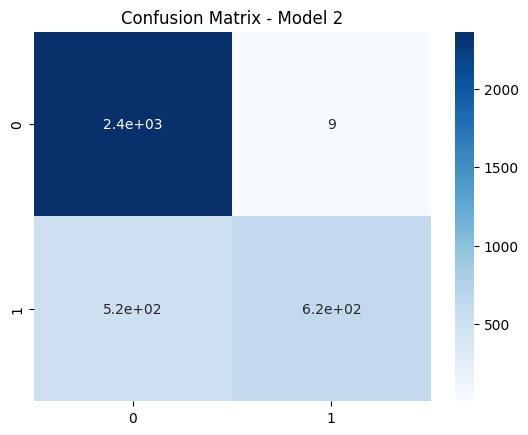

In [9]:
model_2, history_2 = define_model(optimizer='adam', early_stopping=True)
loss_curve_plot(history_2)

y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_2))

sns.heatmap(confusion_matrix(y_test, y_pred_2), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 2")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6024 - loss: 1.0856 - val_accuracy: 0.5934 - val_loss: 1.0431
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6212 - loss: 0.7770 - val_accuracy: 0.6583 - val_loss: 0.7625
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6462 - loss: 0.7134 - val_accuracy: 0.6019 - val_loss: 0.8403
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6459 - loss: 0.6842 - val_accuracy: 0.5675 - val_loss: 0.7394
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6501 - loss: 0.6701 - val_accuracy: 0.6862 - val_loss: 0.6151
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6642 - loss: 0.6459 - val_accuracy: 0.6922 - val_loss: 0.7041
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6801 - loss: 0.6308 - val_accuracy: 0.6919 - val_loss: 0.8007
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6823 - loss: 0.6203 - val_accuracy: 0.6848 - val_

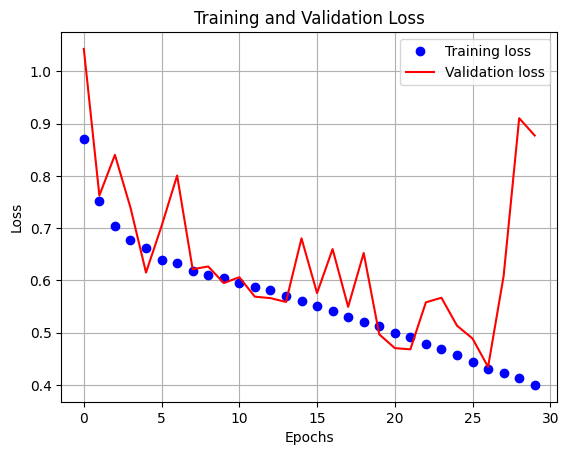

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
              precision    recall  f1-score   support

           0       0.94      0.55      0.69      2371
           1       0.50      0.92      0.65      1141

    accuracy                           0.67      3512
   macro avg       0.72      0.74      0.67      3512
weighted avg       0.79      0.67      0.68      3512



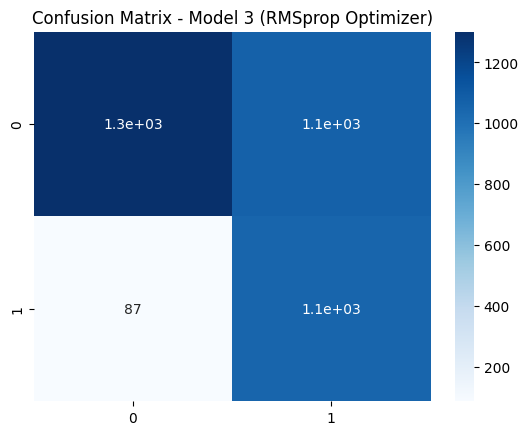

In [10]:
model_3, history_3 = define_model(optimizer='rmsprop', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_3)

y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_3))

sns.heatmap(confusion_matrix(y_test, y_pred_3), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 3 (RMSprop Optimizer)")
plt.show()

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6258 - loss: 1.4455 - val_accuracy: 0.6825 - val_loss: 0.6389
Epoch 2/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6526 - loss: 0.6942 - val_accuracy: 0.6868 - val_loss: 0.6057
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6662 - loss: 0.6411 - val_accuracy: 0.6748 - val_loss: 0.6245
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6668 - loss: 0.6403 - val_accuracy: 0.7070 - val_loss: 0.5894
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6847 - loss: 0.6187 - val_accuracy: 0.7232 - val_loss: 0.5963
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6955 - loss: 0.6052 - val_accuracy: 0.7107 - val_loss: 0.6009
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6918 - loss: 0.6076 - val_accuracy: 0.7304 - val_loss: 0.5831
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7155 - loss: 0.5878 - val_accuracy: 0.7181 - val_

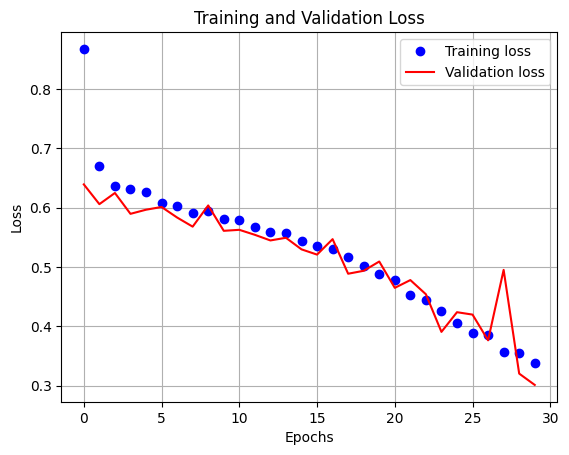

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2371
           1       0.89      0.74      0.81      1141

    accuracy                           0.89      3512
   macro avg       0.89      0.85      0.86      3512
weighted avg       0.89      0.89      0.88      3512



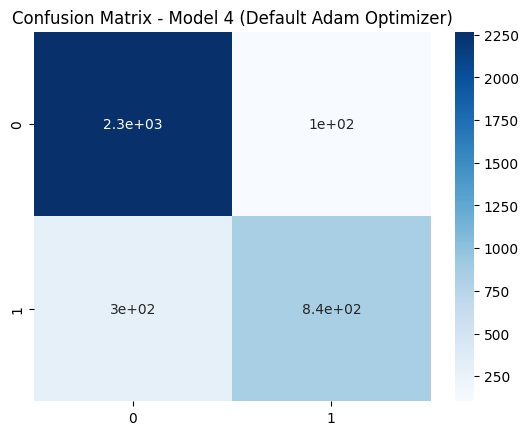

In [11]:
model_4, history_4 = define_model(optimizer='adam', use_regularizer=False, early_stopping=True)
loss_curve_plot(history_4)

y_pred_4 = (model_4.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred_4))

sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, cmap='Blues')
plt.title("Confusion Matrix - Model 4 (Default Adam Optimizer)")
plt.show()

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Model 2 (Adam + Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2371
           1       0.99      0.54      0.70      1141

    accuracy                           0.85      3512
   macro avg       0.90      0.77      0.80      3512
weighted avg       0.87      0.85      0.83      3512

Model 2 (Adam + Reg) F1 Score: 0.7006


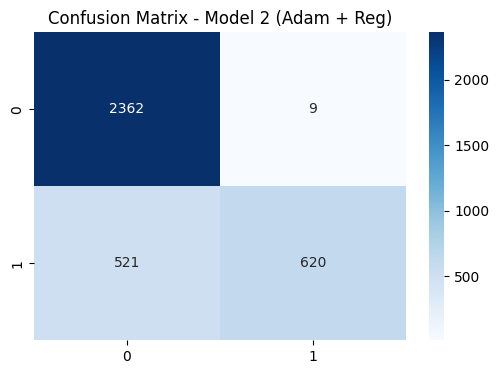

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
=== Model 3 (RMSprop, no Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.55      0.69      2371
           1       0.50      0.92      0.65      1141

    accuracy                           0.67      3512
   macro avg       0.72      0.74      0.67      3512
weighted avg       0.79      0.67      0.68      3512

Model 3 (RMSprop, no Reg) F1 Score: 0.6456


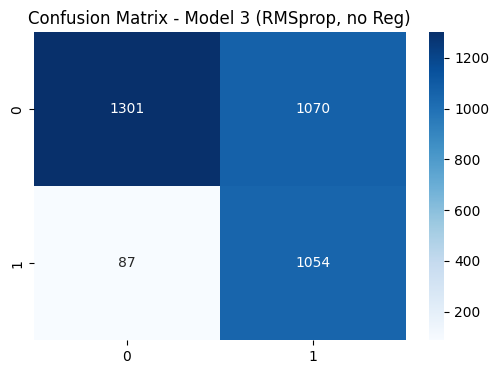

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Model 4 (Adam, no Reg) Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2371
           1       0.89      0.74      0.81      1141

    accuracy                           0.89      3512
   macro avg       0.89      0.85      0.86      3512
weighted avg       0.89      0.89      0.88      3512

Model 4 (Adam, no Reg) F1 Score: 0.8090


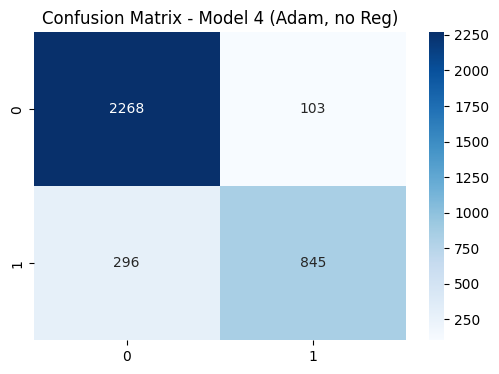

Best model selected: Model 4 (Adam, no Reg) with F1 Score: 0.8090
Best model saved as 'best_earthquake_model.h5'


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
=== Classification Report for Loaded Model ===
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2371
           1       0.89      0.74      0.81      1141

    accuracy                           0.89      3512
   macro avg       0.89      0.85      0.86      3512
weighted avg       0.89      0.89      0.88      3512



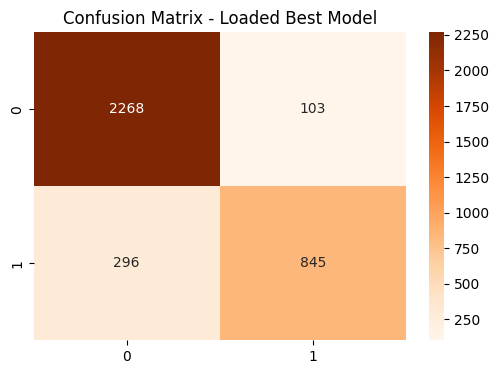

🎉 Congratulations!! Your predictions are complete.


In [15]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


models = {
    "Model 2 (Adam + Reg)": model_2,
    "Model 3 (RMSprop, no Reg)": model_3,
    "Model 4 (Adam, no Reg)": model_4
}

f1_scores = {}

for name, model in models.items():
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    print(f"=== {name} Classification Report ===")
    print(classification_report(y_test, y_pred))
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.4f}")

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]

print(f"Best model selected: {best_model_name} with F1 Score: {f1_scores[best_model_name]:.4f}")


best_model.save('best_earthquake_model.h5')
print("Best model saved as 'best_earthquake_model.h5'")


def make_predictions(model_path, X):
    model = load_model(model_path)
    preds_prob = model.predict(X)
    predictions = (preds_prob > 0.5).astype("int32")
    return predictions


model_path = 'best_earthquake_model.h5'
predictions = make_predictions(model_path, X_test)

print("=== Classification Report for Loaded Model ===")
print(classification_report(y_test, predictions))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Oranges', fmt='d')
plt.title("Confusion Matrix - Loaded Best Model")
plt.show()

print("🎉 Congratulations!! Your predictions are complete.")


In [34]:
from sklearn.ensemble import RandomForestClassifier
import joblib
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, 'saved_models/random_forest_model.pkl')


['saved_models/random_forest_model.pkl']

In [35]:
from google.colab import files
files.download('saved_models/random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import os
from google.colab import files

# Ensure the directory exists
os.makedirs('saved_models', exist_ok=True)

# Save only models 1, 2, and 3 using simplified names
model_1.save('saved_models/model_1.h5')
model_2.save('saved_models/model_2.h5')
model_3.save('saved_models/model_3.h5')

# Save model 4 as the best model
best_model.save('saved_models/best_earthquake_model.h5')

# Download the saved models
files.download('saved_models/model_1.h5')
files.download('saved_models/model_2.h5')
files.download('saved_models/model_3.h5')
files.download('saved_models/best_earthquake_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Congratulations!!
